# Imports

In [1]:
from IPython.core.display import display, HTML

display(HTML("<style>.container { width:100% !important; }</style>"))

In [1]:
%load_ext line_profiler
%load_ext autoreload
%load_ext autotime
%load_ext nb_black
%autoreload 2

time: 141 ms (started: 2023-12-12 09:05:42 +03:00)


<IPython.core.display.Javascript object>

In [2]:
from pyutilz.logginglib import init_logging

logger = init_logging(default_caller_name="stocksranking.py", format="%(asctime)s - %(levelname)s - %(funcName)s-line:%(lineno)d - %(message)s")

logger.info("test")

2023-12-12 09:05:45,126 - INFO - <module>-line:5 - test


time: 2.42 s (started: 2023-12-12 09:05:42 +03:00)


<IPython.core.display.Javascript object>

In [3]:
from stocksranking import *

C:\ProgramData\Anaconda3\lib\site-packages\antropy\fractal.py:197: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit((types.Array(types.float64, 1, "C", readonly=True), types.int32))


time: 11.9 s (started: 2023-12-12 09:05:45 +03:00)


<IPython.core.display.Javascript object>

# Inits

# Data reading

In [158]:
df = read_okx_daily_trades("allspot-aggtrades-2023-11-07.zip", clean=True)
df

<ipython-input-157-77d94f8419aa>:8: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  df["ts"] = pd.to_datetime(df["ts"], unit="ms")


checking float2int:   0%|          | 0/2 [00:00<?, ?it/s]

size reduction:   0%|          | 0/3 [00:00<?, ?it/s]

,ticker,tradeid,side,volume,price,ts
2225129,UMA-USDT,10142073,1,1.26188,1.60000,2023-11-06 15:59:11.872
397,VRA-USDT,10273435,-1,2329.65723,0.00657,2023-11-06 15:59:11.872
375,VRA-USDT,10273437,-1,25300.00000,0.00656,2023-11-06 15:59:11.872
363,VRA-USDT,10273438,-1,4800.00000,0.00656,2023-11-06 15:59:11.872
333,VRA-USDT,10273443,-1,5000.00000,0.00656,2023-11-06 15:59:11.872
...,...,...,...,...,...,...
2305738,TRB-USDT,9658736,-1,0.90756,126.14800,2023-11-07 16:00:59.392
2245182,TRB-USDT,9658737,1,0.17000,126.33800,2023-11-07 16:00:59.392
2245163,TRB-USDT,9658738,1,0.14000,126.32800,2023-11-07 16:00:59.392
2245154,TRB-USDT,9658739,1,0.19000,126.31700,2023-11-07 16:00:59.392


time: 1min 25s (started: 2023-12-04 11:46:25 +03:00)


<IPython.core.display.Javascript object>

<Axes: xlabel='ts'>

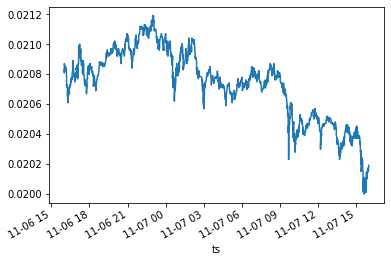

time: 453 ms (started: 2023-12-04 12:55:00 +03:00)


<IPython.core.display.Javascript object>

In [179]:
df.query("ticker=='ZIL-USDT'").set_index("ts").price.plot()

In [125]:
# basic currencies
set(map(lambda x: x.split("-")[1], df.ticker.unique()))

{'BTC',
 'DAI',
 'ETH',
 'EURT',
 'PERFTESTA',
 'PERFTESTB',
 'RVN',
 'TRY',
 'USDC',
 'USDT'}

time: 188 ms (started: 2023-12-03 21:57:47 +03:00)


<IPython.core.display.Javascript object>

In [130]:
#unique tickers
sorted(df.ticker.unique())

['1INCH-USDC',
 '1INCH-USDT',
 'AAVE-BTC',
 'AAVE-ETH',
 'AAVE-USDC',
 'AAVE-USDT',
 'ACA-USDT',
 'ACH-USDT',
 'ADA-BTC',
 'ADA-ETH',
 'ADA-USDC',
 'ADA-USDT',
 'AERGO-USDT',
 'AGLD-USDC',
 'AGLD-USDT',
 'AIDOGE-USDT',
 'AKITA-USDT',
 'ALCX-USDT',
 'ALGO-BTC',
 'ALGO-USDC',
 'ALGO-USDT',
 'ALPHA-USDT',
 'ANT-USDC',
 'ANT-USDT',
 'APE-BTC',
 'APE-USDC',
 'APE-USDT',
 'API3-USDT',
 'APM-USDT',
 'APT-USDC',
 'APT-USDT',
 'AR-USDC',
 'AR-USDT',
 'ARB-USDT',
 'ARG-USDT',
 'AST-USDT',
 'ASTR-USDC',
 'ASTR-USDT',
 'ATOM-BTC',
 'ATOM-ETH',
 'ATOM-USDC',
 'ATOM-USDT',
 'AUCTION-USDT',
 'AVAX-BTC',
 'AVAX-USDC',
 'AVAX-USDT',
 'AXS-USDC',
 'AXS-USDT',
 'AZY-USDT',
 'BABYDOGE-USDT',
 'BADGER-USDT',
 'BAL-USDT',
 'BAND-USDT',
 'BAT-USDT',
 'BCH-BTC',
 'BCH-USDC',
 'BCH-USDT',
 'BETH-ETH',
 'BETH-USDT',
 'BICO-USDT',
 'BIGTIME-USDT',
 'BLOK-USDT',
 'BLUR-USDC',
 'BLUR-USDT',
 'BNB-USDC',
 'BNB-USDT',
 'BNT-USDT',
 'BONE-USDT',
 'BORA-USDT',
 'BORING-USDT',
 'BRWL-USDT',
 'BSB-RVN',
 'BSV-BTC',
 'BS

time: 187 ms (started: 2023-12-03 22:01:03 +03:00)


<IPython.core.display.Javascript object>

## Looking at data

In [153]:
df.query("ticker=='UNI-BTC'")  # .sort_values("tradeid").price.plot()

,ticker,tradeid,side,volume,price,ts
2228611,UNI-BTC,5330464,1,2.33921,0.00014,2023-11-06 16:01:37.621
97269,UNI-BTC,5330465,-1,57.40648,0.00014,2023-11-06 16:05:45.088
2228593,UNI-BTC,5330473,1,27.76676,0.00014,2023-11-06 16:16:31.735
97253,UNI-BTC,5330468,-1,2.34780,0.00014,2023-11-06 16:16:40.448
97252,UNI-BTC,5330471,-1,161.20285,0.00014,2023-11-06 16:16:40.448
...,...,...,...,...,...,...
2228505,UNI-BTC,5330930,1,2.15208,0.00014,2023-11-07 15:50:01.493
97109,UNI-BTC,5330933,-1,49.72976,0.00014,2023-11-07 15:50:04.032
97107,UNI-BTC,5330934,-1,49.69999,0.00014,2023-11-07 15:50:04.032
2228506,UNI-BTC,5330931,1,0.27024,0.00014,2023-11-07 15:50:28.023


time: 109 ms (started: 2023-12-04 11:30:23 +03:00)


<IPython.core.display.Javascript object>

In [147]:
df.query("ticker=='BTC-USDT'")

,ticker,tradeid,side,volume,price,ts
1333189,BTC-USDT,446015659,-1,0.04000,35080.00000,2023-11-06 16:00:04.693
1333140,BTC-USDT,446015661,-1,0.01123,35078.69922,2023-11-06 16:00:04.693
1333136,BTC-USDT,446015662,-1,0.00414,35078.60156,2023-11-06 16:00:04.693
1061738,BTC-USDT,446015664,1,0.11255,35076.30078,2023-11-06 16:00:04.727
1061752,BTC-USDT,446015665,1,0.02989,35076.69922,2023-11-06 16:00:04.727
...,...,...,...,...,...,...
1033316,BTC-USDT,446214833,1,0.00042,34722.19922,2023-11-07 15:59:32.455
1299089,BTC-USDT,446214837,-1,0.03280,34723.19922,2023-11-07 15:59:37.410
1033394,BTC-USDT,446214838,1,0.03562,34723.30078,2023-11-07 15:59:40.357
1299106,BTC-USDT,446214839,-1,0.00283,34723.39844,2023-11-07 15:59:50.579


time: 125 ms (started: 2023-12-04 11:20:17 +03:00)


<IPython.core.display.Javascript object>

In [173]:
df.query("ticker=='BSB-RVN'")

,ticker,tradeid,side,volume,price,ts
1271765,BSB-RVN,767717,-1,308.32999,0.0100,2023-11-06 17:30:56.896
1271766,BSB-RVN,767718,-1,314.38000,0.0100,2023-11-06 17:35:19.040
986281,BSB-RVN,767719,1,236.19048,0.0105,2023-11-06 17:35:19.040
986282,BSB-RVN,767720,1,208.00000,0.0105,2023-11-06 17:50:36.544
1271767,BSB-RVN,767721,-1,261.03000,0.0100,2023-11-06 18:14:38.336
986283,BSB-RVN,767722,1,249.52380,0.0105,2023-11-06 18:19:00.480
1271768,BSB-RVN,767723,-1,178.20000,0.0100,2023-11-06 19:46:23.360
1271769,BSB-RVN,767724,-1,128.03999,0.0100,2023-11-06 20:41:00.160
986284,BSB-RVN,767725,1,190.47620,0.0105,2023-11-06 20:56:17.664
1271770,BSB-RVN,767726,-1,364.10001,0.0100,2023-11-06 23:07:21.984


time: 94 ms (started: 2023-12-04 12:41:08 +03:00)


<IPython.core.display.Javascript object>

In [172]:
df.query("ticker=='RVN-USDT'")

,ticker,tradeid,side,volume,price,ts
2088154,RVN-USDT,16783243,1,10000.00000,0.01828,2023-11-06 15:59:11.872
2088169,RVN-USDT,16783247,1,103259.25000,0.01829,2023-11-06 15:59:11.872
2088186,RVN-USDT,16783248,1,5268.11328,0.01831,2023-11-06 16:01:22.944
2088174,RVN-USDT,16783251,1,8331.19922,0.01830,2023-11-06 16:01:22.944
2088194,RVN-USDT,16783252,1,501.00000,0.01832,2023-11-06 16:03:34.016
...,...,...,...,...,...,...
625808,RVN-USDT,16787810,-1,170.06802,0.01764,2023-11-07 15:52:15.104
625809,RVN-USDT,16787812,-1,7069.62695,0.01764,2023-11-07 15:54:26.176
625812,RVN-USDT,16787814,-1,16300.16309,0.01765,2023-11-07 15:58:48.320
2087712,RVN-USDT,16787816,1,11900.00000,0.01767,2023-11-07 15:58:48.320


time: 93 ms (started: 2023-12-04 12:40:30 +03:00)


<IPython.core.display.Javascript object>

In [196]:
df.query("ticker=='SHIB-BTC'")

,ticker,tradeid,side,volume,price,ts,unified_volume
643650,SHIB-BTC,780974,-1,3.59457e+06,2.37000e-10,2023-11-06 16:07:56.160,1.51669e+16
2112210,SHIB-BTC,781035,1,9.13446e+07,2.38000e-10,2023-11-06 16:07:56.160,3.85420e+17
2112211,SHIB-BTC,781064,1,1.23595e+08,2.38000e-10,2023-11-06 16:07:56.160,5.21499e+17
643675,SHIB-BTC,781065,-1,3.59457e+06,2.38000e-10,2023-11-06 16:07:56.160,1.51669e+16
2112231,SHIB-BTC,781075,1,2.82320e+07,2.39000e-10,2023-11-06 16:10:07.232,1.19122e+17
...,...,...,...,...,...,...,...
643609,SHIB-BTC,783015,-1,7.45494e+06,2.31000e-10,2023-11-07 15:41:19.744,3.14555e+16
643610,SHIB-BTC,783018,-1,4.12619e+06,2.31000e-10,2023-11-07 15:43:30.816,1.74101e+16
2112166,SHIB-BTC,783019,1,2.65811e+05,2.31000e-10,2023-11-07 15:43:30.816,1.12157e+15
643611,SHIB-BTC,783020,-1,1.51525e+07,2.31000e-10,2023-11-07 15:43:30.816,6.39348e+16


time: 94 ms (started: 2023-12-04 13:22:25 +03:00)


<IPython.core.display.Javascript object>

## Geting conversion rates

In [224]:
vol_conversion_rates = get_conversion_rates(df)
vol_conversion_rates

{'AAVE-BTC': 0.0027340000960975885,
 'ADA-BTC': 1.0042000212706625e-05,
 'ALGO-BTC': 3.6199999158270657e-06,
 'APE-BTC': 4.199999966658652e-05,
 'ATOM-BTC': 0.00024340000527445227,
 'AVAX-BTC': 0.0003691999881993979,
 'BCH-BTC': 0.00684799998998642,
 'BSV-BTC': 0.0013989999424666166,
 'BTC-DAI': 1.0,
 'BTC-EURT': 1.0,
 'BTC-USDC': 1.0,
 'BTC-USDT': 1.0,
 'CHZ-BTC': 2.2920000901649473e-06,
 'CRO-BTC': 2.0790000689885346e-06,
 'CRV-BTC': 1.616000008652918e-05,
 'DASH-BTC': 0.000881000014487654,
 'DOGE-BTC': 2.103000042552594e-06,
 'DOT-BTC': 0.00013899999612476677,
 'DYDX-BTC': 6.882000161567703e-05,
 'EOS-BTC': 1.9670000256155618e-05,
 'ETC-BTC': 0.0005244999774731696,
 'ETH-BTC': 0.05420000106096268,
 'FIL-BTC': 0.00012320000678300858,
 'GRT-BTC': 4.0350000745092984e-06,
 'HBAR-BTC': 1.6440000081274775e-06,
 'LINK-BTC': 0.00036100001307204366,
 'LTC-BTC': 0.0021009999327361584,
 'MANA-BTC': 1.2200000128359534e-05,
 'MATIC-BTC': 2.0389999917824753e-05,
 'MKR-BTC': 0.037950001657009125,


time: 297 ms (started: 2023-12-04 17:36:40 +03:00)


<IPython.core.display.Javascript object>

## Basic stats

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2409226 entries, 313 to 55975
Data columns (total 6 columns):
 #   Column   Dtype         
---  ------   -----         
 0   ticker   object        
 1   tradeid  uint32        
 2   side     int8          
 3   volume   float32       
 4   price    float32       
 5   ts       datetime64[ns]
dtypes: datetime64[ns](1), float32(2), int8(1), object(1), uint32(1)
memory usage: 85.0+ MB
time: 0 ns (started: 2023-12-03 21:48:09 +03:00)


<IPython.core.display.Javascript object>

### Trading hours

<Axes: title={'center': 'NTransactions by hour'}, xlabel='ts'>

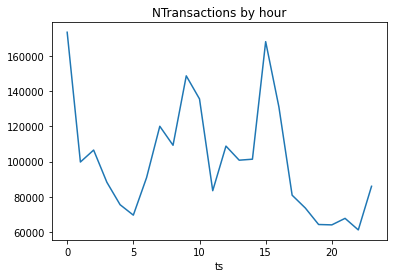

time: 532 ms (started: 2023-12-03 20:56:57 +03:00)


<IPython.core.display.Javascript object>

In [78]:
df.ts.dt.hour.value_counts().sort_index().plot(title="NTransactions by hour")

In [62]:
read_okx_daily_trades("allspot-aggtrades-2022-12-24.zip", clean=True).query("ticker=='STARL-USDT'")

S:\recovered13\Programming\MyCurrentProjects\StocksRanking\stocksranking.py:70: DtypeWarning: Columns (1,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(join(datapath, fname), encoding="GBK", header=None, low_memory=True)


checking float2int:   0%|          | 0/2 [00:00<?, ?it/s]

size reduction:   0%|          | 0/3 [00:00<?, ?it/s]

,ticker,tradeid,side,volume,price,ts
417425,STARL-USDT,26738651,1,187790.0,2.67300e-06,2022-12-23 16:00:07.156
888849,STARL-USDT,26738653,-1,678864.0,2.67300e-06,2022-12-23 16:00:30.157
888732,STARL-USDT,26738654,-1,300000.0,2.67200e-06,2022-12-23 16:03:02.561
888238,STARL-USDT,26738655,-1,2676577.0,2.67000e-06,2022-12-23 16:03:02.561
886655,STARL-USDT,26738656,-1,2330388.0,2.66500e-06,2022-12-23 16:03:02.561
...,...,...,...,...,...,...
414236,STARL-USDT,26749637,1,270389.0,2.61200e-06,2022-12-24 15:57:05.956
414263,STARL-USDT,26749639,1,1063455.0,2.61500e-06,2022-12-24 15:57:15.488
414275,STARL-USDT,26749640,1,83740.0,2.61600e-06,2022-12-24 15:57:15.488
414252,STARL-USDT,26749644,1,1449533.0,2.61400e-06,2022-12-24 15:57:19.062


time: 15.3 s (started: 2023-12-11 12:04:36 +03:00)


<IPython.core.display.Javascript object>

In [63]:
read_okx_daily_trades("allspot-aggtrades-2022-12-25.zip", clean=True).query("ticker=='STARL-USDT'")

S:\recovered13\Programming\MyCurrentProjects\StocksRanking\stocksranking.py:70: DtypeWarning: Columns (1,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(join(datapath, fname), encoding="GBK", header=None, low_memory=True)


checking float2int:   0%|          | 0/2 [00:00<?, ?it/s]

size reduction:   0%|          | 0/3 [00:00<?, ?it/s]

,ticker,tradeid,side,volume,price,ts
1127934,STARL-USDT,26749665,1,652307.0,2.61100e-06,2022-12-24 16:00:00.756
1128094,STARL-USDT,26749673,1,869195.0,2.61400e-06,2022-12-24 16:00:58.056
1128119,STARL-USDT,26749675,1,390138.0,2.61500e-06,2022-12-24 16:01:04.023
1128157,STARL-USDT,26749677,1,16844086.0,2.61600e-06,2022-12-24 16:01:04.421
63804,STARL-USDT,26749668,-1,2116333.0,2.61300e-06,2022-12-24 16:01:17.824
...,...,...,...,...,...,...
63174,STARL-USDT,26759743,-1,433957.0,2.60200e-06,2022-12-25 15:58:43.200
63342,STARL-USDT,26759745,-1,712130.0,2.60400e-06,2022-12-25 15:58:43.200
63343,STARL-USDT,26759752,-1,931385.0,2.60400e-06,2022-12-25 15:58:43.200
1127380,STARL-USDT,26759749,1,594962.0,2.60200e-06,2022-12-25 15:59:11.256


time: 15.1 s (started: 2023-12-11 12:04:51 +03:00)


<IPython.core.display.Javascript object>

### Coins that survided 2 years

In [63]:
new_coins = set(read_okx_daily_trades("allspot-aggtrades-2023-11-07.zip").ticker.unique())
len(new_coins)

<ipython-input-57-db23aef41d46>:2: DtypeWarning: Columns (1,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(join(datapath, fname), encoding="GBK", header=None)


484

time: 4.34 s (started: 2023-12-03 20:31:53 +03:00)


<IPython.core.display.Javascript object>

In [51]:
df = pd.read_csv(join(datapath, "allspot-aggtrades-2021-11-01.zip"), encoding="GBK", header=None)
df

,0,1,2,3,4,5
0,STARL-USDT,606990,SELL,153844.0,0.00004,1635699598106
1,STARL-USDT,607186,SELL,100679.0,0.00004,1635699701105
2,STARL-USDT,607307,SELL,100679.0,0.00004,1635699727124
3,STARL-USDT,606876,SELL,1101500.0,0.00004,1635699467265
4,STARL-USDT,606962,SELL,6782171.0,0.00004,1635699516873
...,...,...,...,...,...,...
6385061,STARL-USDT,607958,SELL,7504169.0,0.00004,1635700513570
6385062,STARL-USDT,602759,SELL,7025621.0,0.00004,1635696344823
6385063,STARL-USDT,604305,SELL,100679.0,0.00004,1635697469874
6385064,STARL-USDT,606002,SELL,3660614.0,0.00004,1635699047274


time: 9.53 s (started: 2023-12-03 20:20:49 +03:00)


<IPython.core.display.Javascript object>

In [62]:
old_coins = set(read_okx_daily_trades("allspot-aggtrades-2021-10-01.zip").ticker.unique())
len(old_coins)

500

time: 7.02 s (started: 2023-12-03 20:31:40 +03:00)


<IPython.core.display.Javascript object>

In [64]:
len(old_coins - new_coins)

242

time: 0 ns (started: 2023-12-03 20:31:59 +03:00)


<IPython.core.display.Javascript object>

In [65]:
len(new_coins - old_coins)

226

time: 0 ns (started: 2023-12-03 20:32:21 +03:00)


<IPython.core.display.Javascript object>

In [66]:
len(old_coins.intersection(new_coins))

258

time: 0 ns (started: 2023-12-03 20:33:40 +03:00)


<IPython.core.display.Javascript object>

# Features

## daily simple stats as features.

In [199]:
vol_conversion_rates = get_conversion_rates(df)
df["unified_volume"] = df["ticker"].map(vol_conversion_rates) * df["volume"]

time: 437 ms (started: 2023-12-04 13:24:31 +03:00)


<IPython.core.display.Javascript object>

In [200]:
df.iloc[df.unified_volume.argmax()]

ticker                              ETH-USDT
tradeid                            318647062
side                                       1
volume                            1448.93408
price                                 1872.0
ts                2023-11-07 10:09:16.800000
unified_volume                      78.52165
Name: 832392, dtype: object

time: 16 ms (started: 2023-12-04 13:24:34 +03:00)


<IPython.core.display.Javascript object>

In [251]:
groups = []

time: 0 ns (started: 2023-12-04 18:29:50 +03:00)


<IPython.core.display.Javascript object>

In [250]:
interval_features = create_interval_features(df)
interval_features.sort_values("ntrades")

  0%|          | 0/484 [00:00<?, ?it/s]

<ipython-input-249-91f99dfa2590>:34: RuntimeWarning: divide by zero encountered in log
  std_val = np.log(std_val / first_price)


,ticker,close_to_open,mean_trade_direction,ntrades,market_volume_share,vol_min,vol_max,vol_argmin,vol_argmax,vol_mean,vol_std,price_min,price_max,price_argmin,price_argmax,price_mean,price_std,close_to_open_rank,max_to_open_rank,market_volume_share_rank,mean_trade_direction_rank
474,SKEB-USDT,-0.00480,0.08333,24,1.78425e-06,2.40552e-05,2.77891e-02,0.25000,0.91667,3.58443e-03,8.33214e-03,-0.01386,0.00358,0.91667,0.20833,-0.00550,-5.31224,0.76299,0.09979,0.02703,0.91476
455,GMX-USDC,-0.02972,-0.22581,31,1.77936e-06,1.40850e-04,2.28024e-02,0.90323,0.41935,2.76744e-03,4.42996e-03,-0.02972,0.01639,0.96774,0.22581,-0.00455,-4.53290,0.39501,0.33056,0.02495,0.04574
170,BTC-DAI,-0.01035,0.06250,32,9.08465e-05,3.00000e-08,6.38139e-01,0.28125,0.06250,1.36878e-01,1.47819e-01,-0.01501,0.00052,0.81250,0.15625,-0.00624,-5.35381,0.70062,0.03742,0.45738,0.89605
476,BSB-RVN,0.00000,-0.05882,34,1.09757e-09,5.58301e-07,5.63861e-06,0.82353,0.50000,1.55644e-06,8.73584e-07,0.00000,0.04879,0.00000,0.05882,0.02326,-3.69061,0.80249,0.74220,0.00208,0.32536
477,WBTC-BTC,0.00010,0.47368,38,5.68799e-05,9.99900e-05,2.19728e+00,0.73684,0.10526,7.21691e-02,3.49990e-01,-0.00070,0.00010,0.57895,0.13158,-0.00011,-8.37102,0.80873,0.03119,0.37630,0.99376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,SOL-USDT,0.02380,-0.04249,84344,3.88136e-02,1.14692e-09,5.66480e+01,0.11041,0.02375,2.21874e-02,2.40041e-01,-0.00874,0.04970,0.01573,0.29291,0.02376,-4.25602,0.91268,0.75052,0.99168,0.43659
73,ETH-USDT,-0.01994,-0.07597,86521,1.42650e-01,5.41927e-08,7.85217e+01,0.26941,0.65939,7.94926e-02,5.39366e-01,-0.02292,0.00339,0.96562,0.22454,-0.00848,-5.15710,0.56965,0.09771,0.99792,0.26819
94,BTC-USDT,-0.01021,-0.08365,89730,1.53029e-01,2.60000e-07,7.07573e+01,0.96124,0.52033,8.22268e-02,4.59713e-01,-0.01606,0.00198,0.77087,0.19170,-0.00695,-5.54642,0.70478,0.07277,1.00000,0.23493
123,ORDI-USDT,0.33420,-0.00712,107538,5.31468e-02,2.06670e-08,1.52723e+01,0.03442,0.19647,2.38282e-02,1.18427e-01,-0.03509,0.50307,0.02505,0.37059,0.33144,-1.72571,0.99792,1.00000,0.99376,0.67568


time: 1min 28s (started: 2023-12-04 18:26:05 +03:00)


<IPython.core.display.Javascript object>

In [246]:
interval_features.iloc[interval_features.mean_trade_direction.idxmin()]

ticker                       KAN-USDT
close_to_open                -0.01372
mean_trade_direction         -0.85911
ntrades                          1306
market_volume_share           0.00003
vol_min                           0.0
vol_max                       0.01775
vol_argmin                    0.40812
vol_argmax                    0.89893
vol_mean                      0.00113
vol_std                       0.00083
price_min                    -0.03231
price_max                         0.0
price_argmin                  0.70597
price_argmax                      0.0
price_mean                   -0.00947
price_std                    -5.85273
close_to_open_rank            0.65489
max_to_open_rank              0.01455
market_volume_share_rank      0.24324
mean_trade_direction_rank     0.00208
Name: 167, dtype: object

time: 16 ms (started: 2023-12-04 17:53:27 +03:00)


<IPython.core.display.Javascript object>

## Batch training

In [4]:
featurized_files = read_feature_files(asset_class="spot")

100%|██████████████████████████████████████████████████████████████████████████████| 805/805 [00:00<00:00, 8473.41it/s]


time: 3.16 s (started: 2023-12-12 09:05:57 +03:00)


<IPython.core.display.Javascript object>

In [5]:
featurized_files[0].close_to_open.describe()

count    498.00000
mean      -0.00036
std        0.04143
min       -0.30519
25%       -0.02326
50%       -0.00413
75%        0.01428
max        0.22661
Name: close_to_open, dtype: float64

time: 16 ms (started: 2023-12-12 09:06:00 +03:00)


<IPython.core.display.Javascript object>

In [6]:
len(featurized_files)

796

time: 0 ns (started: 2023-12-12 09:06:01 +03:00)


<IPython.core.display.Javascript object>

In [7]:
perf = train_models(featurized_files)
perf

model: 0it [00:00, ?it/s]
100%|███████████████████████████████████████████████████████████████████████████████| 796/796 [00:03<00:00, 231.52it/s]


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Default metric period is 5 because AUC is/are not implemented for GPU
model: 1it [01:05, 65.66s/it]
100%|███████████████████████████████████████████████████████████████████████████████| 796/796 [00:02<00:00, 280.86it/s]


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

model: 2it [01:30, 45.36s/it]


,target,model,fold,metric
0,close_to_open_rank,CatBoostClassifier,val,0.68818
1,close_to_open_rank,DummyClassifier_prior,val,0.50000
2,close_to_open_rank,DummyClassifier_most_frequent,val,0.50000
3,close_to_open_rank,DummyClassifier_stratified,val,0.49622
4,close_to_open_rank,DummyClassifier_uniform,val,0.50000
5,close_to_open_rank,CatBoostClassifier,test,0.57875
6,close_to_open_rank,DummyClassifier_prior,test,0.50000
7,close_to_open_rank,DummyClassifier_most_frequent,test,0.50000
8,close_to_open_rank,DummyClassifier_stratified,test,0.49790
9,close_to_open_rank,DummyClassifier_uniform,test,0.50000


time: 1min 30s (started: 2023-12-12 09:06:03 +03:00)


<IPython.core.display.Javascript object>

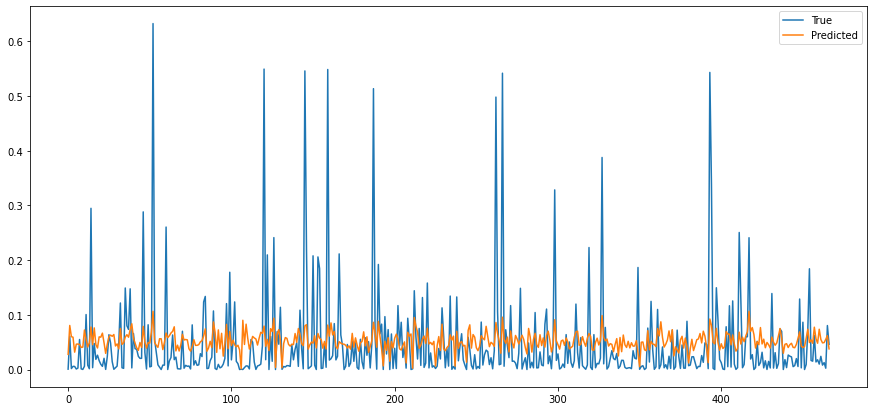

time: 313 ms (started: 2023-12-12 07:43:03 +03:00)


<IPython.core.display.Javascript object>

In [36]:
fig = plt.figure(figsize=(15, 7))
plt.plot(data_set.get_label(), label="True")
plt.plot(preds, label="Predicted")
plt.legend()

In [10]:
len(X_train),len(X_val),len(X_test)

(774, 8, 1)

time: 0 ns (started: 2023-12-09 18:54:40 +03:00)


<IPython.core.display.Javascript object>

## Regression

In [55]:
model = CatBoostRegressor(iterations=10_000, task_type="GPU", early_stopping_rounds=1000)
model.fit(
    pd.concat(X_train, ignore_index=True),
    pd.concat(Y_train, ignore_index=True),
    eval_set=(pd.concat(X_val, ignore_index=True), pd.concat(Y_val, ignore_index=True)),
    plot=True,
    verbose=False,
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

time: 50.5 s (started: 2023-12-11 01:08:04 +03:00)


<IPython.core.display.Javascript object>

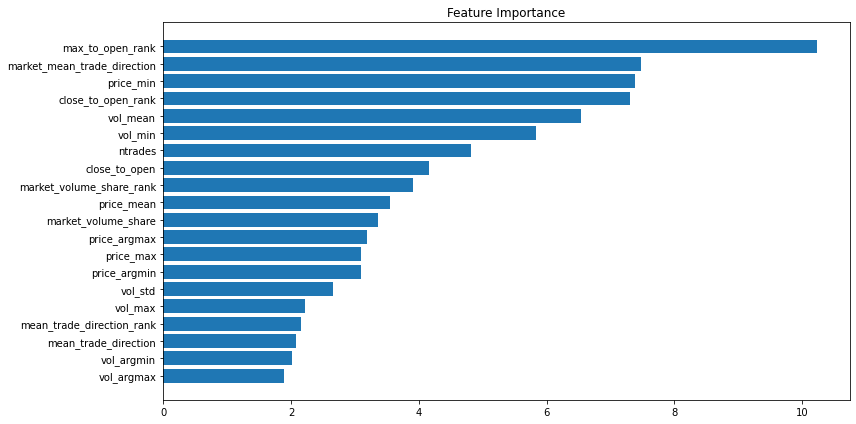

time: 469 ms (started: 2023-12-11 01:30:06 +03:00)


<IPython.core.display.Javascript object>

In [56]:
show_fi(model, drop_columns=[], max_nfeatures=20, X_test=X_val[0])

In [45]:
model = CatBoostClassifier(iterations=10_000, task_type="GPU", eval_metric="AUC", early_stopping_rounds=1000)
model.fit(
    pd.concat(X_train, ignore_index=True),
    pd.concat(Y_train, ignore_index=True) > 0.90,
    eval_set=(pd.concat(X_val, ignore_index=True), pd.concat(Y_val, ignore_index=True) > 0.90),
    plot=True,
    verbose=False,
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Default metric period is 5 because AUC is/are not implemented for GPU


time: 1min 49s (started: 2023-12-10 00:05:58 +03:00)


<IPython.core.display.Javascript object>

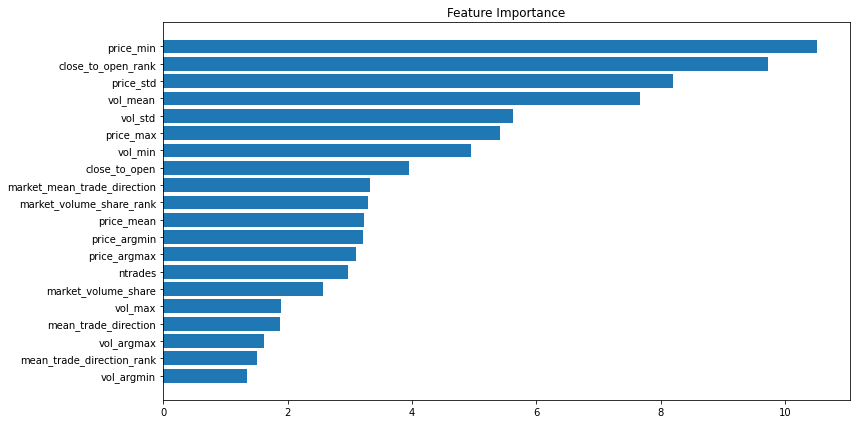

time: 453 ms (started: 2023-12-10 02:24:12 +03:00)


<IPython.core.display.Javascript object>

In [46]:
show_fi(model, drop_columns=[], max_nfeatures=20, X_test=X_val[0])

In [47]:
predictions = model.predict_proba(X_test[0])[:, 1]
predictions[np.argsort(predictions)]

array([0.00283266, 0.00518385, 0.00619176, 0.00620302, 0.00662661,
       0.00667597, 0.00763021, 0.00822373, 0.0093872 , 0.01039331,
       0.01233031, 0.01266387, 0.01313569, 0.01354471, 0.01394491,
       0.01450583, 0.01452706, 0.01455648, 0.01476071, 0.01555254,
       0.01574139, 0.01632769, 0.01639499, 0.01683338, 0.01686499,
       0.01791736, 0.01802298, 0.01820514, 0.01834676, 0.01856835,
       0.01876448, 0.01897931, 0.01966241, 0.01983838, 0.02015157,
       0.02068085, 0.02121467, 0.02155569, 0.02177972, 0.02184632,
       0.02192136, 0.02226611, 0.02233522, 0.02235705, 0.02263342,
       0.02274943, 0.02278168, 0.02348648, 0.02375421, 0.02393009,
       0.02437245, 0.02500842, 0.0254948 , 0.02621614, 0.02682026,
       0.02682371, 0.0269245 , 0.02693534, 0.02748273, 0.02826125,
       0.02827323, 0.02841814, 0.02853998, 0.02869622, 0.02880885,
       0.02890421, 0.02930671, 0.02950646, 0.02965897, 0.0303238 ,
       0.0303444 , 0.03040266, 0.03106832, 0.03107423, 0.03107

time: 15 ms (started: 2023-12-10 02:24:31 +03:00)


<IPython.core.display.Javascript object>

In [48]:
(np.array(common_tickers)[np.argsort(predictions)])[-20:]

array(['AIDOGE-USDT', 'KINE-USDT', 'FITFI-USDT', 'THG-USDT', 'WIFI-USDT',
       'LOOKS-USDT', 'XETA-USDT', 'KONO-USDT', 'BLOK-USDT', 'MDT-USDT',
       'IOTA-USDT', 'DOME-USDT', 'AUCTION-USDT', 'STC-USDT', 'REVV-USDT',
       'MYRIA-USDT', 'DEP-USDT', 'CTXC-USDT', 'ZKS-USDT', 'USTC-USDT'],
      dtype='<U14')

time: 0 ns (started: 2023-12-10 02:24:36 +03:00)


<IPython.core.display.Javascript object>

In [49]:
target_column

'max_to_open_rank'

time: 0 ns (started: 2023-12-10 02:24:38 +03:00)


<IPython.core.display.Javascript object>

In [50]:
df.sort_values(target_column).tail(20).ticker.values

array(['TURBO-USDT', 'LUNA-USDC', 'ETHW-USDC', 'LUNA-USDT', 'ETHW-USDT',
       'CTXC-USDT', 'WSM-USDT', 'MYRIA-USDT', 'DORA-USDT', 'LUNC-USDC',
       'LUNC-USDT', 'ORB-USDT', 'LITH-USDT', 'ERN-USDT', 'DEP-USDT',
       'GHST-USDT', 'MILO-USDT', 'PSTAKE-USDT', 'OM-USDT', 'USTC-USDT'],
      dtype=object)

time: 15 ms (started: 2023-12-10 02:24:40 +03:00)


<IPython.core.display.Javascript object>

In [52]:
set((np.array(common_tickers)[np.argsort(predictions)])[-50:]).intersection(set(df.sort_values(target_column).tail(50).ticker.values))

{'AUCTION-USDT',
 'BLOK-USDT',
 'CTC-USDT',
 'CTXC-USDT',
 'DEP-USDT',
 'DORA-USDT',
 'LITH-USDT',
 'LOOKS-USDC',
 'LOOKS-USDT',
 'LUNC-USDT',
 'MDT-USDT',
 'MYRIA-USDT',
 'PSTAKE-USDT',
 'USTC-USDT'}

time: 0 ns (started: 2023-12-10 02:25:12 +03:00)


<IPython.core.display.Javascript object>

In [43]:
len(common_tickers)

457

time: 15 ms (started: 2023-12-09 23:08:29 +03:00)


<IPython.core.display.Javascript object>

## LtR

In [89]:
print(len(X_test))



1
time: 390 ms (started: 2023-12-05 10:06:21 +03:00)


<IPython.core.display.Javascript object>

In [90]:
from copy import deepcopy

iterations = 200
early_stopping_rounds = min(100, iterations // 2)

default_parameters = {
    "iterations": iterations,
    "eval_metric": "PrecisionAt:top=20",
    "custom_metric": ["PrecisionAt:top=10", "PrecisionAt:top=20", "PrecisionAt:top=50"],
    "verbose": False,
    "random_seed": 0,
    "task_type": "GPU",
}


def fit_model(loss_function, train_pool, eval_pool=None, additional_params=None):
    parameters = deepcopy(default_parameters)
    parameters["loss_function"] = loss_function
    parameters["train_dir"] = loss_function

    if additional_params is not None:
        parameters.update(additional_params)

    model = CatBoostRanker(**parameters)
    model.fit(train_pool, eval_set=eval_pool, plot=True, use_best_model=True, early_stopping_rounds=early_stopping_rounds)

    return model

time: 0 ns (started: 2023-12-05 10:06:22 +03:00)


<IPython.core.display.Javascript object>

In [91]:
model = fit_model("YetiRankPairwise", train_pool=train_pool, eval_pool=eval_pool)  # PairLogitPairwise

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Default metric period is 5 because PFound, PrecisionAt is/are not implemented for GPU
Metric PFound is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric PrecisionAt:top=20 is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric PrecisionAt:top=10 is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric PrecisionAt:top=20 is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric PrecisionAt:top=50 is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


time: 5.72 s (started: 2023-12-05 10:06:23 +03:00)


<IPython.core.display.Javascript object>

In [85]:
model.predict(X_train[0])

array([ 1.57194665e-02, -3.51728900e-02,  3.24206147e-02,  2.27201206e-02,
        2.49453259e-02,  5.76105978e-02,  4.96987343e-02,  3.40008063e-02,
       -3.15920328e-02,  5.18520852e-02,  4.56290242e-02,  1.44883851e-02,
        3.14429044e-02,  3.52220597e-02, -9.11086966e-03,  4.42350435e-02,
       -5.21319588e-02,  5.01861944e-02,  5.28409230e-02,  1.58030859e-02,
        3.19837911e-02,  2.70687862e-03, -5.58471789e-02, -3.67526615e-02,
        2.76285335e-02, -5.88165444e-02,  2.79958398e-02,  5.23279518e-02,
       -4.07468173e-02,  1.92966136e-02,  5.26550073e-02,  4.58610543e-02,
        8.80298109e-03,  2.26634351e-02, -3.11169389e-02,  4.67963836e-02,
        3.03421820e-02,  4.83510367e-02, -5.07304263e-02,  1.61535775e-03,
        4.95744604e-02,  9.47468516e-03,  1.70667093e-02,  1.34114953e-02,
        3.94112818e-02, -3.75932961e-02, -2.57559810e-02,  3.31992664e-02,
        1.44921394e-02,  1.52358476e-02,  4.90544598e-02,  9.05146626e-03,
        5.56469843e-02,  

time: 0 ns (started: 2023-12-05 10:04:57 +03:00)


<IPython.core.display.Javascript object>

In [86]:
Y_train[0]

119    0.68410
284    0.84708
375    0.02012
355    0.05835
98     0.78672
        ...   
362    0.27767
489    0.17304
53     0.36821
479    0.85714
439    0.94567
Name: close_to_open_rank, Length: 496, dtype: float64

time: 0 ns (started: 2023-12-05 10:05:06 +03:00)


<IPython.core.display.Javascript object>

In [93]:
day_number = 145
common_tickers = list(set(featurized_files[day_number].ticker.values).intersection(set(featurized_files[day_number + 1].ticker.values)))
features = featurized_files[day_number].iloc[get_indices(master=featurized_files[day_number].ticker.values, search=common_tickers)].drop(columns=drop_columns)
predictions = model.predict(features)

top = 20
best_real = set(featurized_files[day_number + 1].sort_values([target_column])[f"ticker close_to_open {target_column}".split()].tail(top).ticker.values)
best_predicted = set((np.array(common_tickers)[np.argsort(predictions)])[-top:])
len(best_predicted.intersection(best_real))

0

time: 16 ms (started: 2023-12-05 10:06:43 +03:00)


<IPython.core.display.Javascript object>

In [56]:
predictions[np.argsort(predictions)]

array([-1.04860909e-01, -7.97779647e-02, -7.89267157e-02, -7.71998864e-02,
       -7.71312039e-02, -7.52087564e-02, -7.24459877e-02, -7.19493033e-02,
       -7.12820261e-02, -6.79545843e-02, -6.74250116e-02, -6.73361169e-02,
       -6.58768346e-02, -6.46547173e-02, -6.27999008e-02, -6.26814221e-02,
       -6.24121513e-02, -6.17087361e-02, -6.06022679e-02, -5.90935392e-02,
       -5.89992769e-02, -5.89489330e-02, -5.81780009e-02, -5.73743483e-02,
       -5.69914183e-02, -5.51597137e-02, -5.51038727e-02, -5.41833171e-02,
       -5.41562462e-02, -5.41347290e-02, -5.24351371e-02, -5.14635047e-02,
       -5.06414382e-02, -4.89335793e-02, -4.75347539e-02, -4.71931736e-02,
       -4.69676310e-02, -4.55502059e-02, -4.49974785e-02, -4.43571441e-02,
       -4.37054705e-02, -4.30340488e-02, -4.17149949e-02, -4.13814871e-02,
       -4.13497518e-02, -4.09014638e-02, -4.00632531e-02, -3.70155466e-02,
       -3.68897924e-02, -3.66545234e-02, -3.63368527e-02, -3.53587839e-02,
       -3.49332033e-02, -

time: 16 ms (started: 2023-12-05 09:48:41 +03:00)


<IPython.core.display.Javascript object>

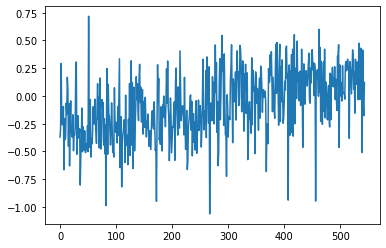

time: 250 ms (started: 2023-12-04 22:32:10 +03:00)


<IPython.core.display.Javascript object>

In [100]:
plt.plot(predictions)

In [36]:
from sklearn.datasets import make_classification
import numpy as np

import xgboost as xgb

# Make a synthetic ranking dataset for demonstration
seed = 1994
X, y = make_classification(random_state=seed)
rng = np.random.default_rng(seed)
n_query_groups = 3
qid = rng.integers(0, 3, size=X.shape[0])

# Sort the inputs based on query index
sorted_idx = np.argsort(qid)
X = X[sorted_idx, :]
y = y[sorted_idx]
qid = qid[sorted_idx]

time: 141 ms (started: 2023-12-05 09:40:53 +03:00)


<IPython.core.display.Javascript object>

In [67]:
X.shape

(100, 20)

time: 0 ns (started: 2023-12-05 09:51:56 +03:00)


<IPython.core.display.Javascript object>

In [68]:
y

array([1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0])

time: 16 ms (started: 2023-12-05 09:52:03 +03:00)


<IPython.core.display.Javascript object>

In [43]:
ranker = xgb.XGBRanker(tree_method="hist", lambdarank_num_pair_per_sample=8, objective="rank:ndcg", lambdarank_pair_method="topk",)
ranker.fit(X, y, qid=qid)

XGBRanker(base_score=None, booster=None, callbacks=None, colsample_bylevel=None,
          colsample_bynode=None, colsample_bytree=None, device=None,
          early_stopping_rounds=None, enable_categorical=False,
          eval_metric=None, feature_types=None, gamma=None, grow_policy=None,
          importance_type=None, interaction_constraints=None,
          lambdarank_num_pair_per_sample=8, lambdarank_pair_method='topk',
          learning_rate=None, max_bin=None, max_cat_threshold=None,
          max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
          max_leaves=None, min_child_weight=None, missing=nan,
          monotone_constraints=None, multi_strategy=None, n_estimators=None,
          n_jobs=None, ...)

time: 62 ms (started: 2023-12-05 09:44:25 +03:00)


<IPython.core.display.Javascript object>

In [79]:
ranker = fit_model("YetiRankPairwise", train_pool=Pool(data=X, label=y, group_id=qid), eval_pool=None)  # PairLogitPairwise

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

You should provide test set for use best model. use_best_model parameter has been switched to false value.
Default metric period is 5 because PFound, PrecisionAt is/are not implemented for GPU
Metric PFound is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric PrecisionAt:top=20 is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric PrecisionAt:top=10 is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric PrecisionAt:top=20 is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric PrecisionAt:top=50 is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


time: 3.8 s (started: 2023-12-05 09:57:31 +03:00)


<IPython.core.display.Javascript object>

In [74]:
df = pd.DataFrame(X, columns=[str(i) for i in range(X.shape[1])])
df["qid"] = qid
ranker.fit(df, y)  # No need to pass qid as a separate argument

from sklearn.model_selection import StratifiedGroupKFold, cross_val_score

# Works with cv in scikit-learn, along with HPO utilities like GridSearchCV
kfold = StratifiedGroupKFold(shuffle=True)
cross_val_score(ranker, df, y, cv=kfold, groups=df.qid)

array([1., 1., 1., 0., 0.])

time: 578 ms (started: 2023-12-05 09:53:35 +03:00)


<IPython.core.display.Javascript object>

In [80]:
scores = ranker.predict(X)

scores

array([ 0.39770333, -1.18150913,  0.31975908,  0.35083227, -1.18854539,
        0.3422499 , -1.14887378,  0.32695029,  0.37119753, -1.14745688,
       -1.18077663,  0.40968096, -1.17124135,  0.2675467 , -0.76810688,
       -1.04638308, -0.24521384, -1.1246191 , -1.03444917,  0.51083159,
        0.12940358, -0.10808301,  0.48982555, -1.17078631,  0.34812118,
       -1.18076752, -1.18318964, -1.05128065,  0.4156473 ,  0.50569873,
       -1.16996669, -1.16992401, -1.18459891, -1.16808432, -1.05900386,
        0.51244997, -0.51855866, -1.05896263, -1.17597517, -0.79770509,
       -1.18132853, -0.75617094,  0.4015236 , -1.1682777 , -0.89450351,
       -0.24338448, -1.09841938,  0.38914852,  0.51234986, -0.85563158,
       -0.40366628,  0.42269612, -0.55308911,  0.43941267,  0.23603164,
       -1.01845262, -0.86863397, -1.17039412, -1.15051241,  0.21382532,
       -0.16835144, -0.18981922,  0.47886491,  0.51441076,  0.39831372,
        0.27148033,  0.50314334, -1.18039723,  0.40806532,  0.42

time: 0 ns (started: 2023-12-05 09:57:44 +03:00)


<IPython.core.display.Javascript object>

# Making it operational

In [8]:
update_okx_hist_data()

100%|███████████████████████████████████████████████████████████████████████████████| 805/805 [00:02<00:00, 317.71it/s]


0

time: 2.53 s (started: 2023-12-12 19:27:38 +03:00)


<IPython.core.display.Javascript object>

In [9]:
create_bulk_features(asset_class="spot")

100%|██████████████████████████████████████████████████████████████████████████████| 805/805 [00:00<00:00, 4680.23it/s]


1


1

time: 2min 33s (started: 2023-12-12 19:27:44 +03:00)


<IPython.core.display.Javascript object>

In [45]:
# df = read_okx_daily_trades("allspot-aggtrades-2022-07-23.zip", clean=True)

time: 0 ns (started: 2023-12-12 07:55:31 +03:00)


<IPython.core.display.Javascript object>

In [55]:
features, last_fname = read_last_known_features_file()

100%|██████████████████████████████████████████████████████████████████████████████| 805/805 [00:00<00:00, 9700.47it/s]

time: 94 ms (started: 2023-12-12 07:59:35 +03:00)


<IPython.core.display.Javascript object>

In [56]:
last_fname

'allspot-aggtrades-2023-12-11.zip'

time: 0 ns (started: 2023-12-12 07:59:36 +03:00)


<IPython.core.display.Javascript object>